# Introduction to Machine Learning Project
# *Binary classification model for a mobile carrier*

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Goal" data-toc-modified-id="Goal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Goal</a></span></li><li><span><a href="#Description-of-the-data" data-toc-modified-id="Description-of-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Description of the data</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Input-data" data-toc-modified-id="Input-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Input data</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Duplicates</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Outliers-in-the-features" data-toc-modified-id="Outliers-in-the-features-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Outliers in the features</a></span></li><li><span><a href="#Target-analysis" data-toc-modified-id="Target-analysis-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Target analysis</a></span></li></ul></li><li><span><a href="#Splitting-data-into-train,-validation-and-test-sets" data-toc-modified-id="Splitting-data-into-train,-validation-and-test-sets-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Splitting data into train, validation and test sets</a></span></li><li><span><a href="#Standard-Scaling" data-toc-modified-id="Standard-Scaling-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Standard Scaling</a></span></li><li><span><a href="#Models'-hyperparameters-tuning" data-toc-modified-id="Models'-hyperparameters-tuning-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Models' hyperparameters tuning</a></span><ul class="toc-item"><li><span><a href="#Preliminary-accuracy-(baseline)" data-toc-modified-id="Preliminary-accuracy-(baseline)-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Preliminary accuracy (baseline)</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Model-selection" data-toc-modified-id="Model-selection-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Model selection</a></span></li><li><span><a href="#Retrain-the-best-tuned-model-on-the-whole-training-set-and-test-it-on-the-test-set" data-toc-modified-id="Retrain-the-best-tuned-model-on-the-whole-training-set-and-test-it-on-the-test-set-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Retrain the best tuned model on the whole training set and test it on the test set</a></span></li><li><span><a href="#Sanity-check" data-toc-modified-id="Sanity-check-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Sanity check</a></span></li></ul></div>

### Goal

Develop a binary classification model for Megaline, a mobile carrier, that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

### Description of the data

Every observation in the dataset contains average monthly behavior information about one user. The information given is as follows:

- `сalls` — number of calls,
- `minutes` — total call duration in minutes,
- `messages` — number of text messages,
- `mb_used` — Internet traffic used in MB,
- `is_ultra` — plan for the current month (Ultra - 1, Smart - 0).

### Imports

In [53]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler as ss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

pd.set_option('display.max_rows', None)

print("Setup Complete")

Setup Complete


### Input data

In [54]:
try:
    df = pd.read_csv('users_behavior.csv')
    
except:
    df = pd.read_csv('/datasets/users_behavior.csv')    

### Descriptive statistics

In [55]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Notes for preprocessing:
- we have the target variable `is_ultra` and 4 numerical features;
- variables' data types are correct;
- no missing values.

In [57]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Notes for data preprocessing:
- all features, except `messages`, seem to be normally distributed as their mean and median values are close to each other. However maximum values for all 4 features are further than 3 std from the mean value. Maybe these are a few outliers, we'll check that in the EDA section. `messages` variable has a very low value at the 25%, which is a sign of a positively skewed distribution;
- the target variable is binary, it has values: 1 when the plan is "Ultra" and 0 when the plan is "Smart". Most plans are "Smart", let's also check whether the 2 classes are balanced.

### Preprocessing
#### Duplicates
Let's check if any rows are duplicated in any data frames.

In [58]:
df.duplicated().sum()

0

### EDA
#### Outliers in the features

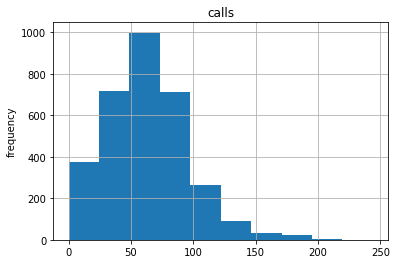

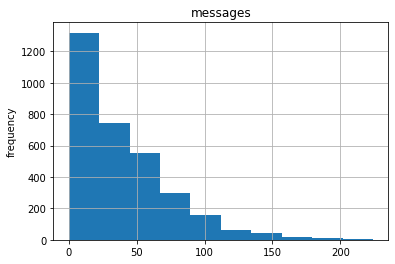

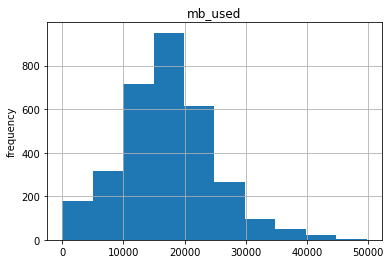

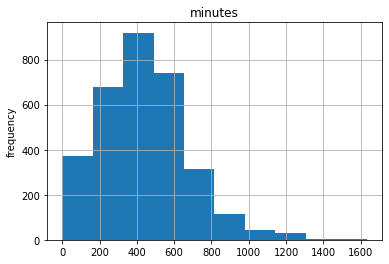

In [59]:
for feature in ['calls','messages','mb_used','minutes']:
    df.hist(feature)
    plt.ylabel('frequency');

According to the above graphs the number of outliers is not significant. We will keep the data as is and if necessary revisit this section after modeling.

Most features' distribution is close to normal, there is only slight deviation from it (except for `messages`). We can try to correct this by applying standard scaling before modeling.

#### Target analysis

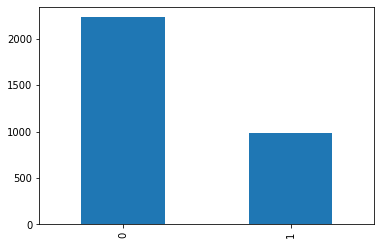

In [60]:
df['is_ultra'].value_counts().plot(kind='bar')

We see that our classes are indeed imbalanced: there are at least twice as many observations for the "Smart" than for the "Ultra" plan.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class ([link](https://machinelearningmastery.com/what-is-imbalanced-classification/)).

Let's try to develop a model first and check the result. In case of issues with accuracy, there are a few [approaches](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/) to work with.

### Splitting data into train, validation and test sets
First, let's split data into train and test sets with the 80/20 proportion, respectively.

In [61]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values on the target variable.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

Next, we'll further split the train set into train and validation with the 80/20 proportion, respectively.

In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state=12345)

In [63]:
X_test.name = 'X_test'
X_valid.name = 'X_valid'
y_train.name = 'y_train'
y_valid.name = 'y_valid'
y_test.name = 'y_test'
X_train.name = 'X_train'

In [64]:
for part in [X_train, y_train, X_valid, y_valid, X_test, y_test]:
    print("Size of", part.name, ":", part.shape)

Size of X_train : (2056, 4)
Size of y_train : (2056,)
Size of X_valid : (515, 4)
Size of y_valid : (515,)
Size of X_test : (643, 4)
Size of y_test : (643,)


### Standard Scaling
The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.

In case of multivariate data, this is done feature-wise (in other words, independently for each column of the data).

Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of that feature.

https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler


In [65]:
sc = ss()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)
X_test = sc.transform(X_test)

### Models' hyperparameters tuning
In this section we are going to figure out the best hyperparameters for each of the 3 learning algorithms:
- Decision Tree;
- Random Forest;
- Logistic Regression.

#### Preliminary accuracy (baseline)

In [66]:
majority_class = y_train.mode()[0]
print("The most frequent label is", majority_class)

y_prelim_pred = np.full(shape=y_train.shape, fill_value=majority_class)
accuracy_score(y_train, y_prelim_pred)

The most frequent label is 0


0.6882295719844358

It means that we can make a preliminary estimate of 68.82% chance of a random plan from this dataset to be "Smart". This number will be a baseline for future models predictions, meaning that a model needs to have accuracy higher than the baseline to be selected.

#### Decision Tree
Default model accuracy:

In [67]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)

acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_decision_tree

69.13

In [68]:
for depth in range(1,11):
    decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    decision_tree.fit(X_train, y_train)
    y_pred = decision_tree.predict(X_valid)
    acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
    print("max_depth =", depth, ":", acc_decision_tree) 

max_depth = 1 : 78.25
max_depth = 2 : 78.25
max_depth = 3 : 77.67
max_depth = 4 : 78.06
max_depth = 5 : 77.67
max_depth = 6 : 79.22
max_depth = 7 : 79.03
max_depth = 8 : 79.03
max_depth = 9 : 77.86
max_depth = 10 : 77.28


Tuned model accuracy:

In [69]:
decision_tree = DecisionTreeClassifier(random_state=12345, max_depth=6)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_valid)

acc_decision_tree = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_decision_tree

79.22

#### Random Forest
Default model accuracy:

In [70]:
rfc = RandomForestClassifier(random_state=12345)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

78.45

In [82]:
d = []
for estim in range(1,51,9):
    for depth in range(1,10):
        rfc = RandomForestClassifier(random_state=12345, n_estimators=estim, max_depth=depth)
        rfc.fit(X_train, y_train)
        y_pred = rfc.predict(X_valid)
        acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
        d.append(
            {
                'n_estimators': estim,
                'max_depth': depth,
                'acc_rfc':  acc_rfc
            }
        )

best_param = pd.DataFrame(d).nlargest(1, ['acc_rfc'], keep='first')

Tuned model accuracy:

In [92]:
rfc = RandomForestClassifier(n_estimators = best_param['n_estimators'].values[0], max_depth = best_param['max_depth'].values[0], random_state=12345)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_valid)

acc_rfc = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_rfc

79.81

#### Logistic Regression
Default model accuracy:

In [43]:
LR = LogisticRegression()
LR.fit(X_train, y_train)     
y_pred = LR.predict(X_valid)

acc_LR = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LR

75.92

In [103]:
for c in [x / 100.0 for x in range(1, 100, 10)]:
    LR = LogisticRegression(random_state=12345, C=c)
    LR.fit(X_train, y_train)
    y_pred = LR.predict(X_valid)
    acc_LR = round(accuracy_score(y_valid,y_pred) * 100, 2)
    print("c =", c, ":", acc_LR) 

c = 0.01 : 76.31
c = 0.11 : 75.92
c = 0.21 : 75.92
c = 0.31 : 75.92
c = 0.41 : 75.92
c = 0.51 : 75.92
c = 0.61 : 75.92
c = 0.71 : 75.92
c = 0.81 : 75.92
c = 0.91 : 75.92


I have tested several hyperparameters and reached the following conclusions:
- `n_jobs`, `solver`, `multi_class`, `penalty`, `C` don't influence the accuracy score at all;
- `class_weight` = 'balanced' worsens the score;
- `class_weight` = {0:0.6, 1:0.4} gives the highest score (76.89);
- `tol` = 0.05 gives the highest score (76.89)

In [116]:
LR = LogisticRegression(solver="liblinear", multi_class="ovr", max_iter=200, class_weight={0:0.6, 1:0.4}, tol=0.05, random_state=12345)
LR.fit(X_train, y_train)     
y_pred = LR.predict(X_valid)

acc_LR = round(accuracy_score(y_valid,y_pred) * 100, 2)
acc_LR

76.89

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the correlation coefficient of the features in the decision function.

Positive coefficients increase the odds of the response (and thus increase the probability), and negative coefficients decrease the odds of the response (and thus decrease the probability).

In [46]:
coeff_df = pd.DataFrame()
coeff_df['Feature'] = ['calls','minutes','messages','mb_used']
coeff_df["Correlation"] = pd.Series(LR.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,messages,0.392931
0,calls,0.321334
3,mb_used,0.319076
1,minutes,0.062745


We can see that all 4 coefficients are positive, which implies a positive correlation between the features and the target. The `minutes` variable has the lowest effect (close to 0) on the target, so it can probably be even dropped. The other 3 features have similar effects on the target.

### Model selection

In [47]:
models = pd.DataFrame({
    'Model': ['Decision Tree','Random Forest','Logistic Regression'],
    'Score': [acc_decision_tree, acc_rfc, acc_LR]})
sorted_by_score = models.sort_values(by='Score', ascending=False)

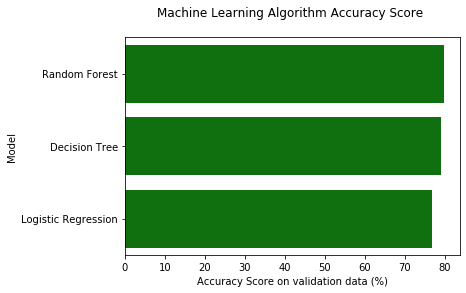

In [48]:
sns.barplot(x='Score', y = 'Model', data = sorted_by_score, color = 'g')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score on validation data (%)')
plt.ylabel('Model');

### Retrain the best tuned model on the whole training set and test it on the test set

In [49]:
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=12345)

In [50]:
rfc = RandomForestClassifier(n_estimators =10, max_depth=9, random_state=12345)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

acc_rfc = round(accuracy_score(y_test,y_pred) * 100, 2)
acc_rfc

81.34

### Sanity check

The final accuracy of our model is much higher (12.5%) than the baseline accuracy that we would get if instead of classifying we simply predicted majority class target value for each new observation.

# Conclusion

In this project we have **developed a binary classification model that analyzes subscribers' behavior and recommends one of the newer plans: Smart or Ultra**.

First of all, we have familiarized ourselves with the data by performing the descriptive statistics. We didn't find any missing or duplicated values. 

**In the following section we have performed an exploratory data analysis and reached the following conclusions**:
- The number of outliers is not significant. We decided to keep the data as is and if necessary revisit this section after modeling;
- Most features' distribution is  close to normal, there is only slight deviation from it (except for `messages`). We tried to correct this by applying standard scaling before modeling;
- We noticed that our target classes are imbalanced: there are at least twice as many observations for the "Smart" than for the "Ultra" plan. Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. We have tried to correct this issue in the later sections by using the `stratify` parameter. It makes a split so that the proportion of values in the sample produced will be the same as the proportion of values in the target variable. 

In the next step we have **tuned 3 learning algorithms to achieve the highest possible validation accuracy** and thus select the best model. **Random Forest model** showed the highest score (76.89). Then we have retrained this model on the whole training set (including validation set) and tested it with the test set that our model didn't see before. We have reached **81.34% accuracy on the test set**. 

Finally, we have checked our model for **sanity** by comparing the final score to the baseline accuracy. The final accuracy of our model is much higher (12.5%) than the baseline accuracy that we would get if instead of classifying we simply predicted majority class target value for each new observation.